In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        # Create a trainable weight variable for the centers of the RBFs
        self.centers = self.add_weight(name='centers',
                                      shape=(self.units, input_shape[-1]),
                                      initializer='uniform',
                                      trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        # Calculate the radial basis functions for each input sample and each RBF center
        diff = K.expand_dims(inputs) - self.centers  # shape: (batch_size, units, input_dim)
        norm = K.sum(K.square(diff), axis=-1)  # shape: (batch_size, units)
        rbf = K.exp(-self.gamma * norm)  # shape: (batch_size, units)

        return rbf

    def compute_output_shape(self, input_shape):
        return input_shape[0], self.units

In [ ]:
def training_model(filename):
    # load data
    df = pd.read_csv(filename, delimiter=';')
    # input and output
    X = df.drop(columns=["GOAL"])
    y = df.GOAL
    # dataset splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # dataset normalization
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # create the model
    model = Sequential()
    model.add(Flatten(input_shape=(12,)))  # Adjust the input shape to (12,)
    model.add(RBFLayer(12, 0.5))
    model.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression
    model.compile(optimizer='rmsprop', loss=mean_squared_error)  # Use mean_squared_error for regression
    # train model
    model.fit(X_train, y_train, batch_size=8, epochs=100)
    # data prediction
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    # evaluation
    plt.figure(figsize=(11, 5))

    plt.subplot(121)
    plt.scatter(pred_train, y_train, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_train: {r2_score(y_train, pred_train):.3f}", fontsize=14)

    plt.subplot(122)
    plt.scatter(pred_test, y_test, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_test: {r2_score(y_test, pred_test):.3f}", fontsize=14);
    plt.show()
    return model

Position:  CB.csv
Epoch 1/100
129/129 [==============================] - 0s 982us/step - loss: 4.2934
Epoch 2/100
129/129 [==============================] - 0s 1ms/step - loss: 3.8532
Epoch 3/100
129/129 [==============================] - 0s 1ms/step - loss: 3.5257
Epoch 4/100
129/129 [==============================] - 0s 974us/step - loss: 3.2297
Epoch 5/100
129/129 [==============================] - 0s 1ms/step - loss: 2.9614
Epoch 6/100
129/129 [==============================] - 0s 1ms/step - loss: 2.7246
Epoch 7/100
129/129 [==============================] - 0s 1ms/step - loss: 2.5146
Epoch 8/100
129/129 [==============================] - 0s 1ms/step - loss: 2.3232
Epoch 9/100
129/129 [==============================] - 0s 1ms/step - loss: 2.1627
Epoch 10/100
129/129 [==============================] - 0s 1ms/step - loss: 2.0184
Epoch 11/100
129/129 [==============================] - 0s 2ms/step - loss: 1.8901
Epoch 12/100
129/129 [==============================] - 0s 1ms/step - loss

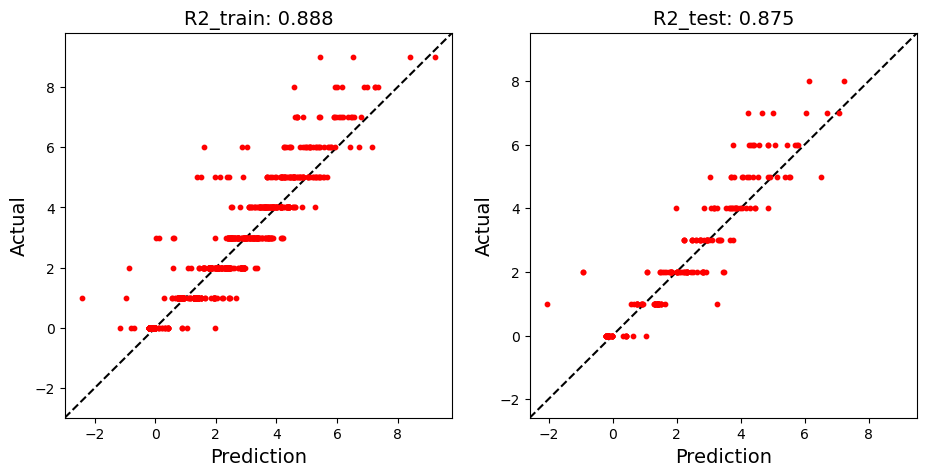

Model Summary:
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 12)                0         
                                                                 
 rbf_layer_7 (RBFLayer)      (None, 12)                144       
                                                                 
 dense_7 (Dense)             (None, 1)                 13        
                                                                 
Total params: 157 (628.00 Byte)
Trainable params: 157 (628.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Position:  LB.csv
Epoch 1/100
151/151 [==============================] - 0s 964us/step - loss: 10.0903
Epoch 2/100
151/151 [==============================] - 0s 1ms/step - loss: 5.7240
Epoch 3/100
151/151 [==============================] - 0s 1ms/step - loss:

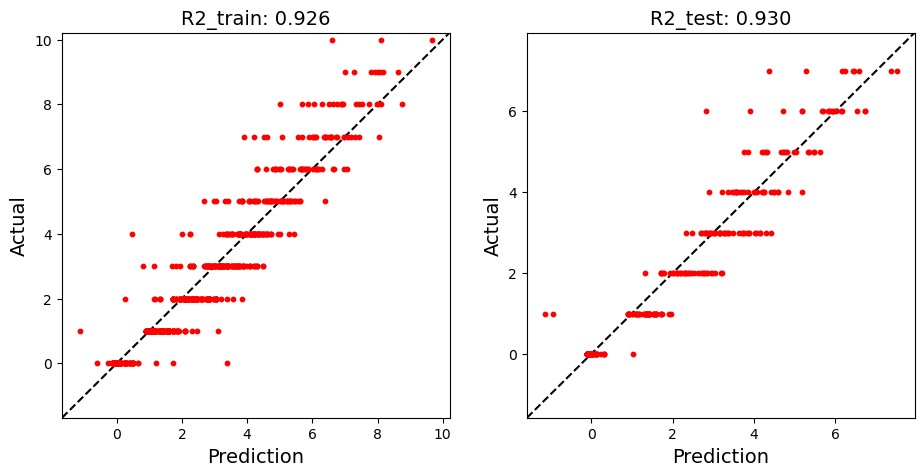

Model Summary:
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 12)                0         
                                                                 
 rbf_layer_9 (RBFLayer)      (None, 12)                144       
                                                                 
 dense_9 (Dense)             (None, 1)                 13        
                                                                 
Total params: 157 (628.00 Byte)
Trainable params: 157 (628.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Position:  LW.csv
Epoch 1/100
115/115 [==============================] - 1s 1ms/step - loss: 11.4099
Epoch 2/100
115/115 [==============================] - 0s 1ms/step - loss: 9.0389
Epoch 3/100
115/115 [==============================] - 0s 1ms/step - loss: 8

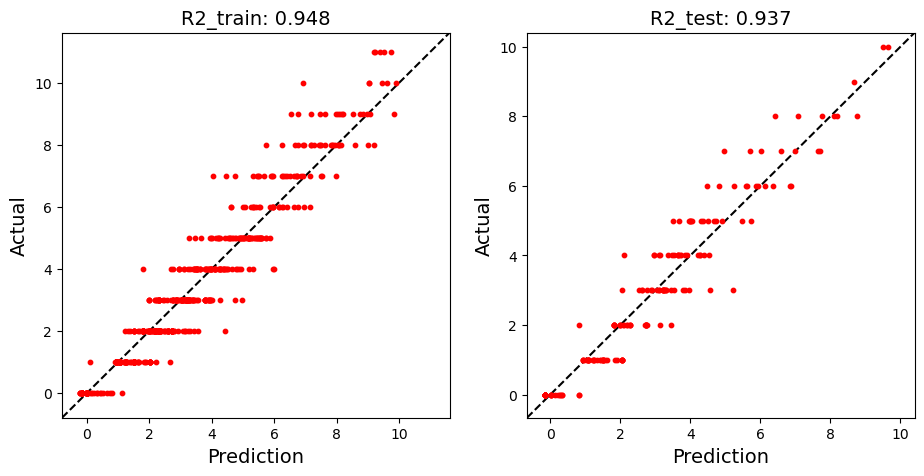

Model Summary:
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 12)                0         
                                                                 
 rbf_layer_11 (RBFLayer)     (None, 12)                144       
                                                                 
 dense_11 (Dense)            (None, 1)                 13        
                                                                 
Total params: 157 (628.00 Byte)
Trainable params: 157 (628.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Position:  P.csv
Epoch 1/100
153/153 [==============================] - 0s 952us/step - loss: 3.9823
Epoch 2/100
153/153 [==============================] - 0s 1ms/step - loss: 2.4026
Epoch 3/100
153/153 [==============================] - 0s 1ms/step - loss: 

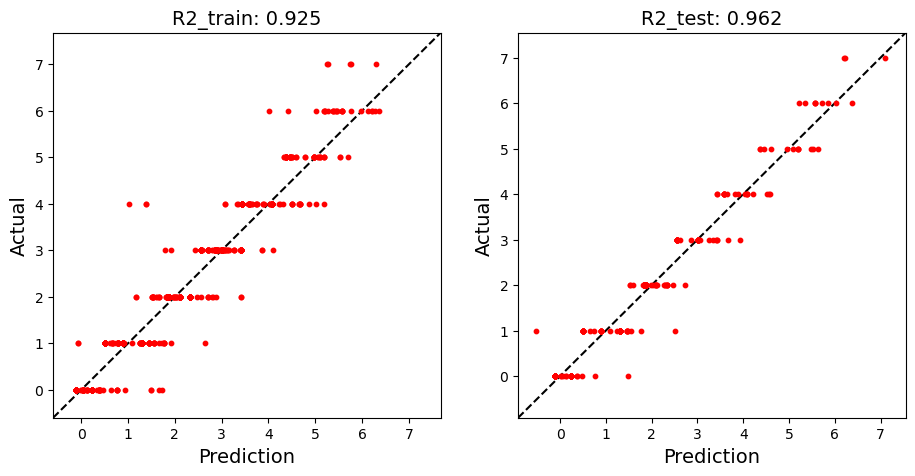

Model Summary:
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 12)                0         
                                                                 
 rbf_layer_13 (RBFLayer)     (None, 12)                144       
                                                                 
 dense_13 (Dense)            (None, 1)                 13        
                                                                 
Total params: 157 (628.00 Byte)
Trainable params: 157 (628.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Position:  RB.csv
Epoch 1/100
110/110 [==============================] - 1s 1ms/step - loss: 8.2253
Epoch 2/100
110/110 [==============================] - 0s 1ms/step - loss: 7.2402
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 6

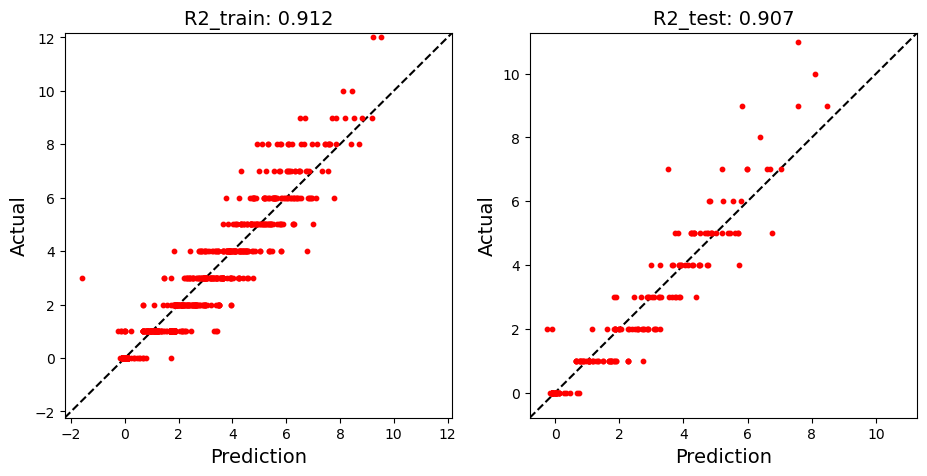

Model Summary:
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 12)                0         
                                                                 
 rbf_layer_15 (RBFLayer)     (None, 12)                144       
                                                                 
 dense_15 (Dense)            (None, 1)                 13        
                                                                 
Total params: 157 (628.00 Byte)
Trainable params: 157 (628.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Position:  RW.csv
Epoch 1/100
115/115 [==============================] - 1s 1ms/step - loss: 9.3311
Epoch 2/100
115/115 [==============================] - 0s 1ms/step - loss: 7.2125
Epoch 3/100
115/115 [==============================] - 0s 1ms/step - loss: 6

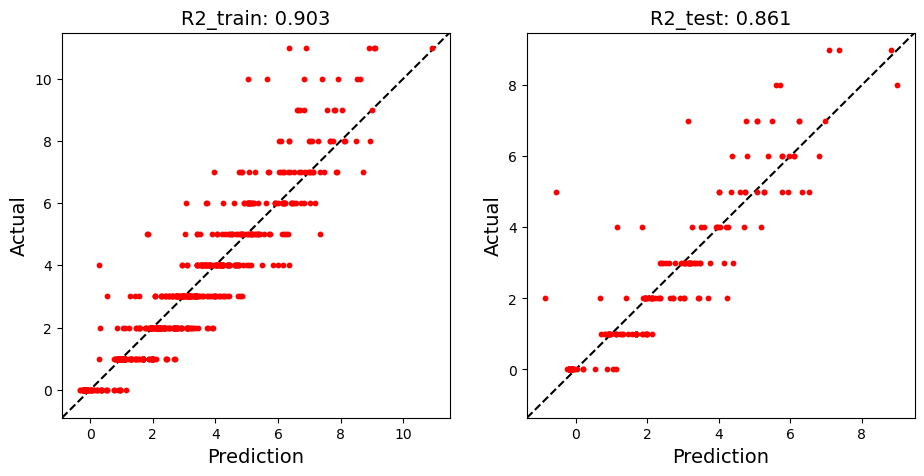

Model Summary:
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 12)                0         
                                                                 
 rbf_layer_17 (RBFLayer)     (None, 12)                144       
                                                                 
 dense_17 (Dense)            (None, 1)                 13        
                                                                 
Total params: 157 (628.00 Byte)
Trainable params: 157 (628.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None



In [9]:
for i in os.listdir('data/'):
    print('Position: ', i.split(',')[0])
    training_model('data/'+i)
    print('')